# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading the dataset

In [2]:
churn = pd.read_csv(r'Churn_status(Churn_status).csv')
demo = pd.read_csv(r'Customer_Demographic(Customer_Demographicc).csv')
online = pd.read_csv(r'customer_Onlinestatus(Online_status).csv')
service = pd.read_csv(r'Customer_service(Customer_Service).csv')
trans = pd.read_csv(r'Customer_Transaction(Trans_History).csv')

df = pd.merge(churn,demo, on='CustomerID')
df = pd.merge(df,online, on='CustomerID')
df = pd.merge(df,service, on='CustomerID')
df = pd.merge(df,trans, on='CustomerID')
df.head()

,CustomerID,ChurnStatus,Age,Gender,MaritalStatus,IncomeLevel,LoginFrequency,ServiceUsage,InteractionType,ResolutionStatus,AmountSpent,ProductCategory
0,1,0,62,M,Single,Low,34,Mobile App,Inquiry,Resolved,416.50,Electronics
1,2,1,65,M,Married,Low,5,Website,Inquiry,Resolved,54.96,Clothing
2,2,1,65,M,Married,Low,5,Website,Inquiry,Resolved,197.50,Electronics
3,2,1,65,M,Married,Low,5,Website,Inquiry,Resolved,101.31,Furniture
4,2,1,65,M,Married,Low,5,Website,Inquiry,Resolved,397.37,Clothing


In [3]:
# Drop Gender and MaritalStatus columns
df.drop(['Gender', 'MaritalStatus','CustomerID'], axis=1, inplace=True)

# Confirm the changes
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ChurnStatus       5204 non-null   int64  
 1   Age               5204 non-null   int64  
 2   IncomeLevel       5204 non-null   object 
 3   LoginFrequency    5204 non-null   int64  
 4   ServiceUsage      5204 non-null   object 
 5   InteractionType   5204 non-null   object 
 6   ResolutionStatus  5204 non-null   object 
 7   AmountSpent       5204 non-null   float64
 8   ProductCategory   5204 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 366.0+ KB


# Performing Data Cleaning

In [4]:
key_columns = ['Age', 'IncomeLevel', 'LoginFrequency', 'ServiceUsage', 'ChurnStatus']

# Drop duplicates based on key customer behavior columns
df.drop_duplicates(subset=key_columns, keep='first', inplace=True)



In [5]:
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662 entries, 0 to 5199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ChurnStatus       662 non-null    int64  
 1   Age               662 non-null    int64  
 2   IncomeLevel       662 non-null    object 
 3   LoginFrequency    662 non-null    int64  
 4   ServiceUsage      662 non-null    object 
 5   InteractionType   662 non-null    object 
 6   ResolutionStatus  662 non-null    object 
 7   AmountSpent       662 non-null    float64
 8   ProductCategory   662 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 51.7+ KB


## Observations¶
There are no missing values. However, there are about 284 duplicated values

In [6]:
# Performing data statistical analysis
df.describe()

,ChurnStatus,Age,LoginFrequency,AmountSpent
count,662.000000,662.000000,662.000000,662.000000
mean,0.216012,43.045317,26.237160,246.310725
std,0.411834,15.384268,14.110208,142.836071
min,0.000000,18.000000,1.000000,5.760000
25%,0.000000,29.000000,14.000000,120.930000
50%,0.000000,43.000000,28.000000,248.195000
75%,0.000000,56.000000,38.000000,368.410000
max,1.000000,69.000000,49.000000,499.510000


# converting necessary datat types

In [7]:
categorical_cols = ['IncomeLevel', 'ProductCategory', 'InteractionType', 'ResolutionStatus', 'ServiceUsage']

for col in categorical_cols:
    df[col] = df[col].astype('category')

df['ChurnStatus'] = df['ChurnStatus'].astype(int)


# Performing EDA

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


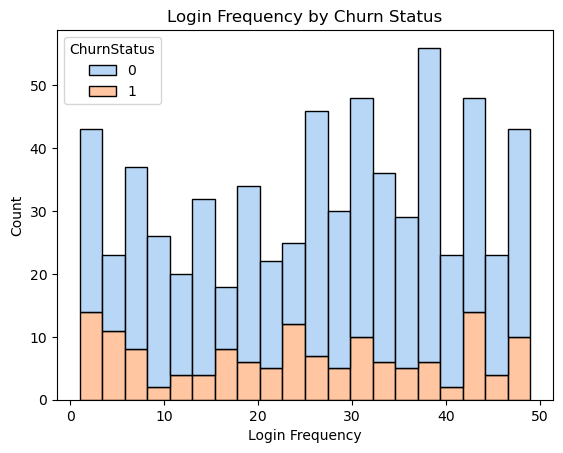

In [8]:
sns.histplot(data=df, x='LoginFrequency', hue='ChurnStatus', multiple='stack', bins=20, palette='pastel')
plt.title('Login Frequency by Churn Status')
plt.xlabel('Login Frequency')
plt.ylabel('Count')
plt.show()

import warnings
warnings.filterwarnings('ignore')


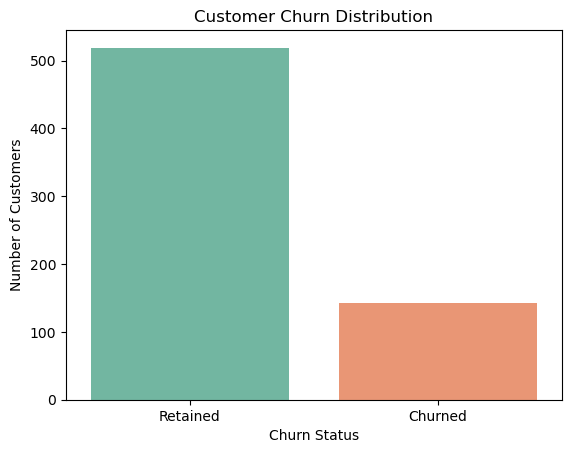

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='ChurnStatus', palette='Set2')
plt.title('Customer Churn Distribution')
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

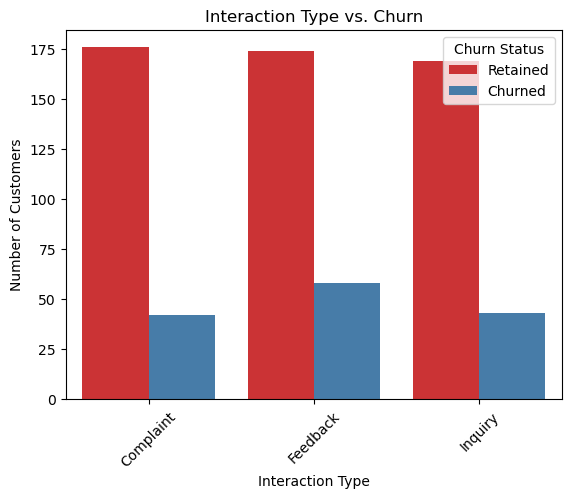

In [10]:
# Convert ChurnStatus to string (or category) for visualization
df['ChurnStatus'] = df['ChurnStatus'].astype(str)

# Now create the plot
sns.countplot(data=df, x='InteractionType', hue='ChurnStatus', palette='Set1')
plt.title('Interaction Type vs. Churn')
plt.xticks(rotation=45)
plt.xlabel('Interaction Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status', labels=['Retained', 'Churned'])
plt.show()

import warnings
warnings.filterwarnings('ignore')



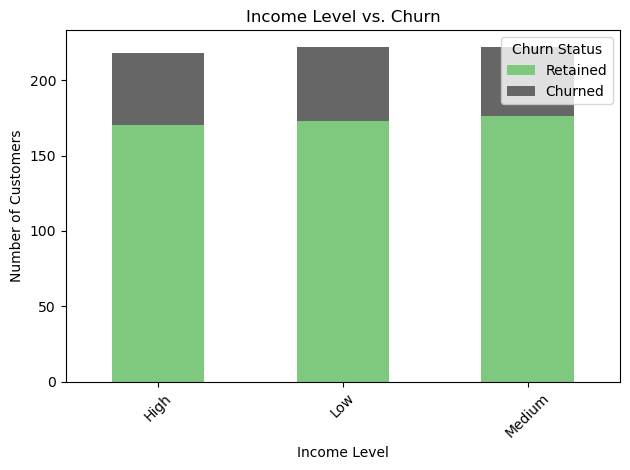

In [11]:
income_churn = df.groupby(['IncomeLevel', 'ChurnStatus']).size().unstack().fillna(0)
income_churn.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Income Level vs. Churn')
plt.xlabel('Income Level')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status', labels=['Retained', 'Churned'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


import warnings
warnings.filterwarnings('ignore')


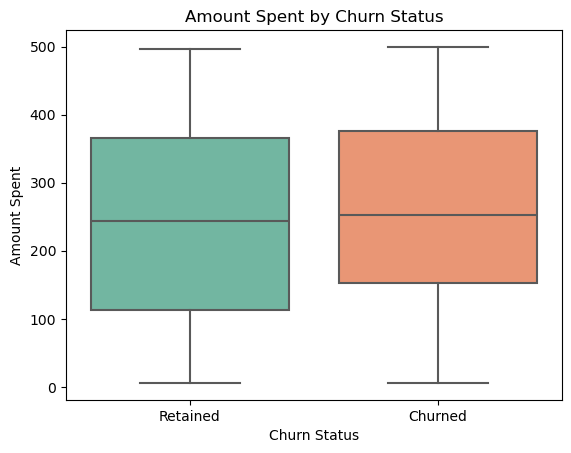

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure ChurnStatus is categorical for clearer axis labels
df['ChurnStatus'] = df['ChurnStatus'].astype(str)

sns.boxplot(data=df, x='ChurnStatus', y='AmountSpent', palette='Set2')
plt.title('Amount Spent by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Amount Spent')
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.show()


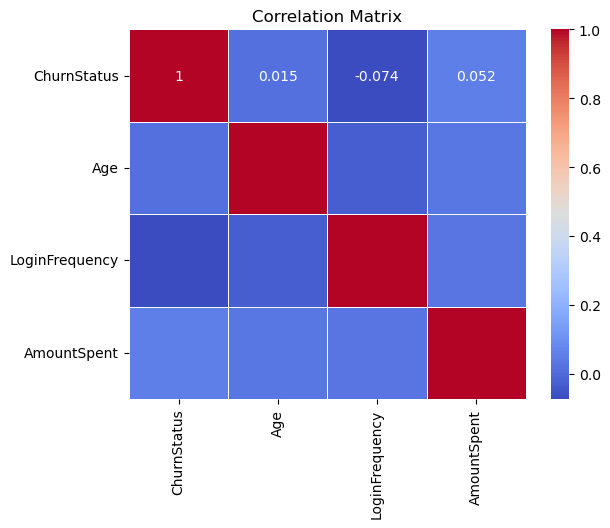

In [13]:
# Optional: Convert ChurnStatus to numeric if it's not already
df['ChurnStatus'] = df['ChurnStatus'].astype(int)

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# Correlation
corr = df[numeric_cols].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [14]:
df.head()

,ChurnStatus,Age,IncomeLevel,LoginFrequency,ServiceUsage,InteractionType,ResolutionStatus,AmountSpent,ProductCategory
0,0,62,Low,34,Mobile App,Inquiry,Resolved,416.50,Electronics
1,1,65,Low,5,Website,Inquiry,Resolved,54.96,Clothing
8,0,18,Low,3,Website,Inquiry,Resolved,241.06,Books
14,0,21,Low,2,Website,Inquiry,Resolved,125.64,Electronics
24,0,57,Medium,2,Website,Feedback,Resolved,365.57,Books


In [15]:
df.to_csv('customer_churn_cleaned.csv', index=False)


In [16]:
Import pandas as pd 

SyntaxError: invalid syntax (3221293895.py, line 1)

In [22]:
df = pd.read_csv('customer_churn_cleaned.csv')

In [23]:
df.head()

,ChurnStatus,Age,IncomeLevel,LoginFrequency,ServiceUsage,InteractionType,ResolutionStatus,AmountSpent,ProductCategory
0,0,62,Low,34,Mobile App,Inquiry,Resolved,416.50,Electronics
1,1,65,Low,5,Website,Inquiry,Resolved,54.96,Clothing
2,0,18,Low,3,Website,Inquiry,Resolved,241.06,Books
3,0,21,Low,2,Website,Inquiry,Resolved,125.64,Electronics
4,0,57,Medium,2,Website,Feedback,Resolved,365.57,Books


## converting columns to encoding for modeling 

In [24]:
# One-hot encode categorical columns
categorical_cols = ['IncomeLevel', 'ServiceUsage', 'InteractionType', 'ResolutionStatus', 'ProductCategory']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Apply to only boolean columns automatically
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

df.head()

,ChurnStatus,Age,LoginFrequency,AmountSpent,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website,InteractionType_Feedback,InteractionType_Inquiry,ResolutionStatus_Unresolved,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Groceries
0,0,62,34,416.50,1,0,0,0,0,1,0,0,1,0,0
1,1,65,5,54.96,1,0,0,1,0,1,0,1,0,0,0
2,0,18,3,241.06,1,0,0,1,0,1,0,0,0,0,0
3,0,21,2,125.64,1,0,0,1,0,1,0,0,1,0,0
4,0,57,2,365.57,0,1,0,1,1,0,0,0,0,0,0


# checking if our data is balance


In [25]:
df['ChurnStatus'].value_counts()

ChurnStatus
0    519
1    143
Name: count, dtype: int64

# Since we have an imbalance data for our target  we need to do a resample of the data.
* To balance your imbalanced target variable (ChurnStatus), you can use several techniques — the most common and effective is resampling.

In [26]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('ChurnStatus', axis=1)
y = df['ChurnStatus']

# Step 1: Split the data (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Step 2: Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Optional: check class balance
from collections import Counter
print(f"Before SMOTE: {Counter(y_train)}")
print(f"After SMOTE:  {Counter(y_train_resampled)}")




Before SMOTE: Counter({0: 363, 1: 100})
After SMOTE:  Counter({0: 363, 1: 363})


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter space
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

      
# Initialize random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Initialize random search
rfs = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,
                                   cv=5, n_iter=10, random_state=42)

In [28]:
rfs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42)

In [29]:
best_model = rfs.best_estimator_

In [30]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC


Accuracy: 0.7788944723618091
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5766249254621347

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.88       156
           1       0.00      0.00      0.00        43

    accuracy                           0.78       199
   macro avg       0.39      0.50      0.44       199
weighted avg       0.61      0.78      0.69       199



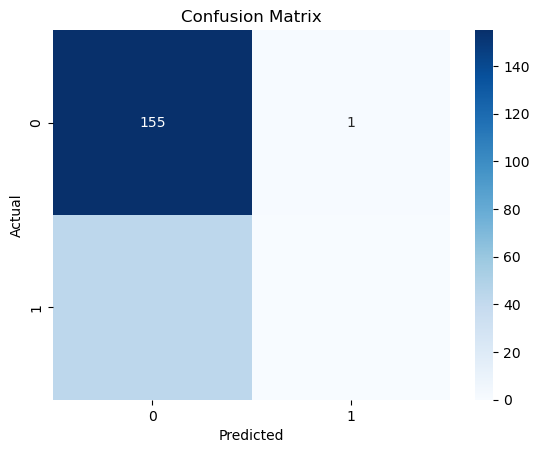

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [32]:
from collections import Counter
print(Counter(y_train))


Counter({0: 363, 1: 100})


In [33]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


In [34]:
rfs.fit(X_train_resampled, y_train_resampled)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42)

In [35]:
best_model = rfs.best_estimator_

In [36]:
y_pred = rfs.predict(X_test)
y_proba = rfs.predict_proba(X_test)[:, 1]


Accuracy: 0.7437185929648241
Precision: 0.25
Recall: 0.09302325581395349
F1 Score: 0.13559322033898305
ROC AUC: 0.4370900417412045

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       156
           1       0.25      0.09      0.14        43

    accuracy                           0.74       199
   macro avg       0.52      0.51      0.49       199
weighted avg       0.67      0.74      0.70       199



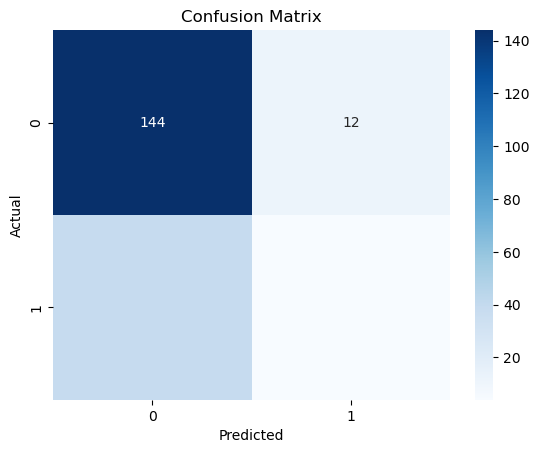

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train.head()

,Age,LoginFrequency,AmountSpent,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website,InteractionType_Feedback,InteractionType_Inquiry,ResolutionStatus_Unresolved,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Groceries
252,41,27,76.29,1,0,1,0,0,0,0,0,0,0,0
333,54,34,47.23,0,1,0,0,1,0,1,1,0,0,0
219,45,32,27.56,0,0,1,0,1,0,0,0,1,0,0
171,37,32,400.78,1,0,0,1,0,1,0,0,0,0,0
72,23,49,131.30,0,0,0,0,0,0,1,0,0,1,0


In [39]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler # normalise data using scaler

# initialize scaler
scaler = MinMaxScaler()

sX_train = scaler.fit_transform(X_train)
sX_test = scaler.transform(X_test)

In [40]:
# check if scaling is successful 
print('Minimum values per feature:\n',sX_train.min(axis=0))
print('Maximum values per feature:\n',sX_train.max(axis=0))

Minimum values per feature:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Maximum values per feature:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [41]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [42]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth=6, min_samples_leaf=8)

In [43]:
# fit the model
dtree.fit(sX_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [44]:
pred = dtree.predict(sX_test)

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       108
           1       0.33      0.04      0.07        25

    accuracy                           0.80       133
   macro avg       0.57      0.51      0.48       133
weighted avg       0.72      0.80      0.74       133

[[106   2]
 [ 24   1]]


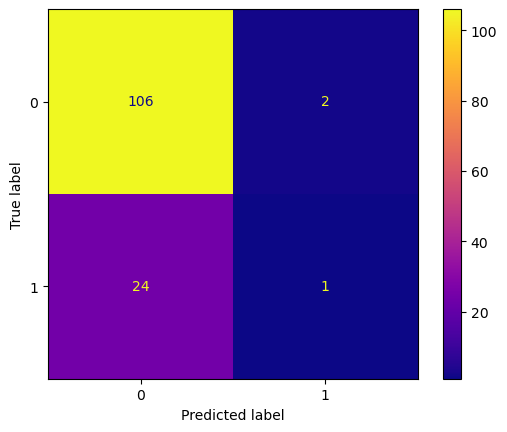

In [45]:
print('Classification Report')
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(ConfusionMatrixDisplay.from_estimator(dtree,sX_test,y_test,cmap='plasma'));

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.69      0.77       108
           1       0.27      0.48      0.34        25

    accuracy                           0.65       133
   macro avg       0.56      0.59      0.55       133
weighted avg       0.74      0.65      0.69       133

[[75 33]
 [13 12]]


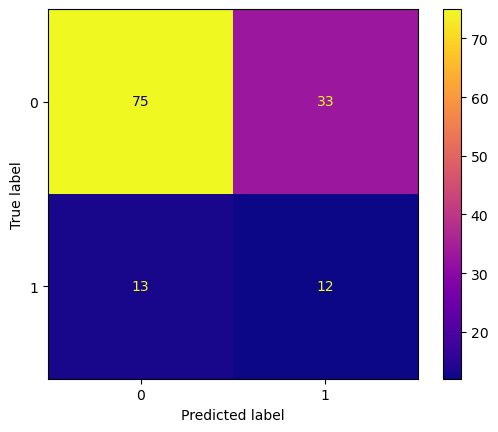

In [46]:
# Improving the model
# initializing model with class weight
dtree_cw =  DecisionTreeClassifier(criterion = 'gini', random_state = 100,class_weight={0:1, 1:3}, max_depth=6, min_samples_leaf=8)

# fit the model
dtree_cw.fit(sX_train,y_train)

# model prediction
pred2 = dtree_cw.predict(sX_test)

# printing reports
print('Classification Report')
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))

print(ConfusionMatrixDisplay.from_estimator(dtree_cw,sX_test,y_test,cmap='plasma'));

Model accuracy with SMOTEENN on test set:0.42697
Classification Report (with SMOTEENN):
               precision    recall  f1-score   support

           0    0.73077   0.63333   0.67857        30
           1    0.82540   0.88136   0.85246        59

    accuracy                        0.79775        89
   macro avg    0.77808   0.75734   0.76552        89
weighted avg    0.79350   0.79775   0.79385        89

Confusion Matrix (with SMOTEENN):
 [[19 11]
 [ 7 52]]


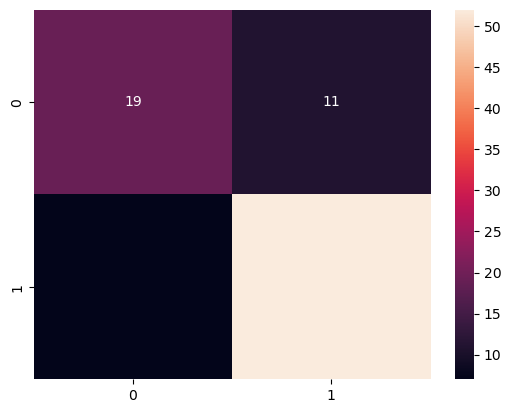

In [47]:
# Applying SMOTEENN to handle class imbalance
sm = SMOTEENN(random_state =100)
X_resampled,y_resampled = sm.fit_resample(sX_train,y_train)

# split the resampled data into training and test sets
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resampled,y_resampled, test_size = 0.2, random_state = 100)

# train the decision tree model on resampled data
dtree_sm = DecisionTreeClassifier(criterion = 'gini', random_state = 100,max_depth=6, min_samples_leaf=8)
dtree_sm.fit(Xr_train,yr_train)

# predict and evaluate on the test set from the resampled data
pred3 = dtree_sm.predict(Xr_test)
dtree_score = dtree.score(Xr_test,yr_test)

# Display the accuracy and classification report
print(f"Model accuracy with SMOTEENN on test set:{dtree_score:.5f}")
print('Classification Report (with SMOTEENN):\n', classification_report(yr_test,pred3,digits =5))

# Display the confusion matrix for the model trained with SMOTEENN
m_resampled = confusion_matrix(yr_test,pred3)
sns.heatmap(m_resampled,annot=True, fmt = 'g')
print('Confusion Matrix (with SMOTEENN):\n',m_resampled)

In [48]:
from collections import Counter
print(Counter(y_train))

Counter({0: 411, 1: 118})


In [49]:
X.head()

,Age,LoginFrequency,AmountSpent,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website,InteractionType_Feedback,InteractionType_Inquiry,ResolutionStatus_Unresolved,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Groceries
0,62,34,416.50,1,0,0,0,0,1,0,0,1,0,0
1,65,5,54.96,1,0,0,1,0,1,0,1,0,0,0
2,18,3,241.06,1,0,0,1,0,1,0,0,0,0,0
3,21,2,125.64,1,0,0,1,0,1,0,0,1,0,0
4,57,2,365.57,0,1,0,1,1,0,0,0,0,0,0
